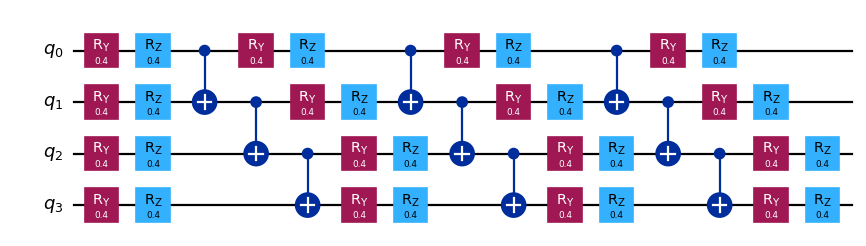

In [1]:
from qiskit.circuit.library import EfficientSU2

circuit = EfficientSU2(num_qubits=4, entanglement="linear").decompose()
circuit.assign_parameters([0.4] * len(circuit.parameters), inplace=True)
circuit.draw("mpl", scale=0.8)

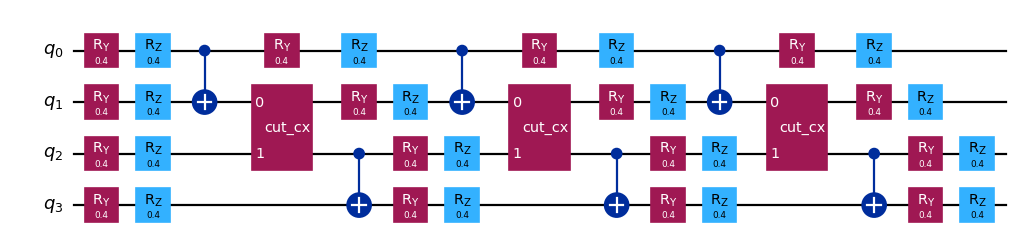

In [2]:
from circuit_knitting.cutting import cut_gates


# Find the indices of the distant gates
cut_indices = [
    i
    for i, instruction in enumerate(circuit.data)
    if {circuit.find_bit(q)[0] for q in instruction.qubits} == {1, 2}
]

# Decompose distant CNOTs into TwoQubitQPDGate instances
qpd_circuit, bases = cut_gates(circuit, cut_indices)

# from qiskit.circuit import ClassicalRegister


# qpd_circuit.add_register(ClassicalRegister(4))
# qpd_circuit.measure([0, 1, 2, 3], [0, 1, 2, 3])

# qpd_circuit.measure_all()
qpd_circuit.draw("mpl", scale=0.8)

In [9]:
from benchmark.ckt import run_ckt
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Sampler
# from qiskit.primitives import BackendSampler, Sampler
from circuit_knitting.utils.simulation import ExactSampler


res = run_ckt(qpd_circuit, Sampler())

In [8]:
res

0.22036004066467227